In [1]:
!ls

arucoConfig			       marker_mapper1.0.15
CableDrivenRobotCableModel-master.zip  marker_mapper1.0.15.zip
Data				       Tryouts.ipynb
MarkerConfigurationCamMat.zip


In [1]:
import cv2
from cv2 import aruco

import os
import sys
import numpy as np
import aruco
from matplotlib import pyplot as plt
import pkg_resources

In [2]:
# load board and camera parameters
#boardconfig = aruco.BoardConfiguration("block1(lowest).yml")
camparam = aruco.CameraParameters()
camparam.readFromXMLFile("./arucoConfig/baumer12mm1mf.yml")

# create detector and get parameters
detector = aruco.MarkerDetector()
params = detector.getParameters()

# print detector parameters
print("detector params:")
for val in dir(params):
    if not val.startswith("__"):
        print("\t{} : {}".format(val, params.__getattribute__(val)))

# load video
cap = cv2.VideoCapture("./Data/baumer_video0043.avi")
ret, frame = cap.read()

while ret:
    markers = detector.detect(frame)

    for marker in markers:
        # print marker ID and point positions
        print("Marker: {:d}".format(marker.id))
        for i, point in enumerate(marker):
            print("\t{:d} {}".format(i, str(point)))
        marker.draw(frame, np.array([255, 255, 255]), 2)

        # calculate marker extrinsics for marker size of 3.5cm
        marker.calculateExtrinsics(0.035, camparam)
        # print("Marker extrinsics:\n{}\n{}".format(marker.Tvec, marker.Rvec))
        aruco.CvDrawingUtils.draw3dAxis(frame, camparam, marker.Rvec, marker.Tvec, .1)
        print("detected ids: {}".format(", ".join(str(m.id) for m in markers)))

    # add aruco version to frame
    y, x, c = frame.shape
    text = "aruco {}".format(pkg_resources.require("aruco")[0].version)
    font = cv2.FONT_HERSHEY_PLAIN
    font_scale = 2
    thickness = 2
    cv2.putText(frame, text, (15, y - 15), font, font_scale, (255, 255, 255), thickness,
                cv2.LINE_AA)

    # show frame
    if 'DISPLAY' in os.environ.keys():
        cv2.imshow("frame", frame)
        cv2.waitKey(10)
    else:
        print("No display!")

    # read next frame
    ret, frame = cap.read()

cap.release()
cv2.destroyAllWindows()

detector params:
	acquire : <built-in method acquire of SwigPyObject object at 0x7f5330cc3960>
	append : <built-in method append of SwigPyObject object at 0x7f5330cc3960>
	disown : <built-in method disown of SwigPyObject object at 0x7f5330cc3960>
	next : <built-in method next of SwigPyObject object at 0x7f5330cc3960>
	own : <built-in method own of SwigPyObject object at 0x7f5330cc3960>
Marker: 7
	0 [282.52356 380.38092]
	1 [272.20654 440.03186]
	2 [210.56512 436.2629 ]
	3 [221.30638 376.50833]
detected ids: 7, 15, 19, 21, 24
Marker: 15
	0 [336.07635 457.01453]
	1 [327. 512.]
	2 [306.4534 495.9292]
	3 [314.05695 436.1687 ]
detected ids: 7, 15, 19, 21, 24
Marker: 19
	0 [ 70.73457 530.75616]
	1 [ 95.758705 535.31165 ]
	2 [ 81.16438 593.94604]
	3 [ 56.45632 591.0177 ]
detected ids: 7, 15, 19, 21, 24
Marker: 21
	0 [1735.485    467.24542]
	1 [1717.  413.]
	2 [1735.8706  390.7542]
	3 [1754.  446.]
detected ids: 7, 15, 19, 21, 24
Marker: 24
	0 [1758.5774   327.63815]
	1 [1823.1678   312.72537]

Marker: 7
	0 [282.86163 380.98322]
	1 [272.00397 440.3425 ]
	2 [210.86676 436.4629 ]
	3 [221.37096 376.5029 ]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 70.98102 530.4023 ]
	1 [ 95.95508 535.81665]
	2 [ 81.24543 594.16797]
	3 [ 55.94823 590.5788 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.6901   467.09726]
	1 [1717.  412.]
	2 [1735.5151  390.7186]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.423    328.24905]
	1 [1822.7377   312.32114]
	2 [1843.8536   371.03732]
	3 [1779.2975  386.7485]
detected ids: 7, 19, 21, 24
Marker: 7
	0 [282.6042  380.74292]
	1 [272.00598 440.44897]
	2 [210.72887 436.25046]
	3 [221.71346 376.0899 ]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 70.99779 530.4716 ]
	1 [ 95.84202 535.74176]
	2 [ 81.32757 594.20154]
	3 [ 55.888676 590.3671  ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.794    466.95367]
	1 [1717.  412.]
	2 [1735.515    390.71964]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.354    328.01758]
	1 [1822.

Marker: 7
	0 [282.72043 380.72525]
	1 [272.1344  440.25064]
	2 [210.71323 436.24582]
	3 [221.51111 376.45035]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.074234 530.4199  ]
	1 [ 95.88078 535.5905 ]
	2 [ 81.36052 594.16187]
	3 [ 56.048317 590.52454 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.6378   467.23456]
	1 [1717.  413.]
	2 [1735.5592  390.7816]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.4467  328.2426]
	1 [1822.6825  312.3192]
	2 [1843.8302  371.2359]
	3 [1779.2023   386.83374]
detected ids: 7, 19, 21, 24
Marker: 7
	0 [282.73083 380.76996]
	1 [272.1779 440.1415]
	2 [210.7236  436.25967]
	3 [221.38751 376.55466]
detected ids: 7, 19, 24
Marker: 19
	0 [ 71.00919 530.33154]
	1 [ 95.98203 535.6015 ]
	2 [ 81.29246 594.1272 ]
	3 [ 56.125916 590.54614 ]
detected ids: 7, 19, 24
Marker: 24
	0 [1758.417    328.19257]
	1 [1822.6909   312.26694]
	2 [1843.8721  370.9555]
	3 [1779.3203   386.99872]
detected ids: 7, 19, 24
Marker: 7
	0 [282.77072 380.94287]
	1 [272.

Marker: 7
	0 [282.94672 381.0548 ]
	1 [272.0653  440.21353]
	2 [210.8485 436.2927]
	3 [221.50664 376.36026]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.03058 530.43774]
	1 [ 95.96325 535.5809 ]
	2 [ 81.32059 594.02747]
	3 [ 56.137222 590.61066 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.6483   467.19574]
	1 [1717.  412.]
	2 [1735.494    390.75046]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.4642  328.3335]
	1 [1822.7649   312.40433]
	2 [1843.8942   370.96124]
	3 [1779.3978   386.98322]
detected ids: 7, 19, 21, 24
Marker: 7
	0 [282.82956 380.83948]
	1 [272.1216  440.23898]
	2 [210.86041 436.39377]
	3 [221.61887 376.24957]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.09389 530.3816 ]
	1 [ 95.93649 535.637  ]
	2 [ 81.24504 594.12494]
	3 [ 56.133835 590.56915 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.6993   467.11795]
	1 [1717.  412.]
	2 [1735.5345   390.85327]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.478    328.22128]
	1 [182

Marker: 7
	0 [282.80844 380.845  ]
	1 [272.07132 440.47665]
	2 [210.68037 436.32986]
	3 [221.5015  376.42953]
detected ids: 7, 19, 24
Marker: 19
	0 [ 71.10552 530.29877]
	1 [ 95.87418 535.6745 ]
	2 [ 81.303406 594.1084  ]
	3 [ 56.062096 590.58185 ]
detected ids: 7, 19, 24
Marker: 24
	0 [1758.4117   328.44522]
	1 [1822.7626   312.37677]
	2 [1843.8251   371.02698]
	3 [1779.363   387.0157]
detected ids: 7, 19, 24
Marker: 7
	0 [282.85538 380.89352]
	1 [272.237  440.0704]
	2 [210.70215 436.2695 ]
	3 [221.51888 376.28662]
detected ids: 7, 19, 24
Marker: 19
	0 [ 70.98564 530.3234 ]
	1 [ 95.907135 535.52026 ]
	2 [ 81.41858 593.99097]
	3 [ 56.080505 590.4551  ]
detected ids: 7, 19, 24
Marker: 24
	0 [1758.4175   328.24957]
	1 [1822.8007   312.35898]
	2 [1843.8032  371.3869]
	3 [1779.2938   387.10715]
detected ids: 7, 19, 24
Marker: 7
	0 [282.6443 380.6606]
	1 [272.14822 440.17413]
	2 [210.88562 436.37433]
	3 [221.55583 376.36746]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.11471 530.2728 ]
	1

Marker: 7
	0 [282.69684 380.74362]
	1 [272.18594 440.28946]
	2 [210.69957 436.21097]
	3 [221.4732  376.38745]
detected ids: 7, 19, 24
Marker: 19
	0 [ 71.0966  530.35266]
	1 [ 96.03027 535.65753]
	2 [ 81.36497 594.1943 ]
	3 [ 56.08953 590.45624]
detected ids: 7, 19, 24
Marker: 24
	0 [1758.4357   328.37875]
	1 [1822.7548   312.36273]
	2 [1843.979   371.3621]
	3 [1779.4036   387.12372]
detected ids: 7, 19, 24
Marker: 7
	0 [282.80615 380.78064]
	1 [272.1074  440.24408]
	2 [210.83853 436.30496]
	3 [221.502  376.4012]
detected ids: 7, 19, 21, 24
Marker: 19
	0 [ 71.063805 530.3242  ]
	1 [ 95.91299 535.6399 ]
	2 [ 81.49527 594.02704]
	3 [ 56.050404 590.60236 ]
detected ids: 7, 19, 21, 24
Marker: 21
	0 [1735.5848  467.1868]
	1 [1717.  412.]
	2 [1735.5898   390.77856]
	3 [1754.  446.]
detected ids: 7, 19, 21, 24
Marker: 24
	0 [1758.4592  328.2944]
	1 [1822.7754   312.38864]
	2 [1843.8817  371.0524]
	3 [1779.0404   386.76953]
detected ids: 7, 19, 21, 24
Marker: 7
	0 [282.7687  380.72388]
	1 [272.

In [2]:
cap = cv2.VideoCapture('./Data/baumer_video0043.avi')

ret, first_image = cap.read()
first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)

In [3]:
first_image.shape

(1188, 1920, 3)

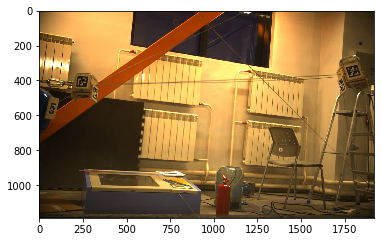

In [4]:
plt.imshow(first_image)

In [25]:
aruco_dict = aruco.Dictionary_get(aruco.DICT)